# Case Study on Probability for Data Science
   ### Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

    Attribute Information:
    
    • cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    • cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
    • cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    • bruises: bruises=t, no=f
    • odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    • gill-attachment: attached=a, descending=d, free=f, notched=n
    • gill-spacing: close=c, crowded=w, distant=d
    • gill-size: broad=b, narrow=n
    • gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    • stalk-shape: enlarging=e, tapering=t
    • Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    • stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
    • stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
    • stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    • stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    • veil-type: partial=p, universal=u
    • veil-colour: brown=n, orange=o, white=w, yellow=y
    • ring-number: none=n, one=o, two=t
    • ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    • spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    • population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    • habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### 1.  Importing necessary libraries and reading the dataset to the python environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.shape

(8124, 23)

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Inference:-
    1.The dataset contains 23 features including the target column.
    2.All the features are categorical datatype.
    3.The dataset doesnot contain any null values.

### 2.Exploratory data analysis

In [9]:
data['class'].unique()## p=poisonous & e= edible

array(['p', 'e'], dtype=object)

In [10]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Text(0.5, 1.0, 'COUNT OF POISONOUS OR EDIBLE MUSHROOMS')

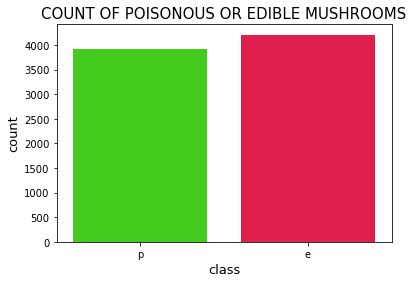

In [14]:
sns.countplot(x = 'class', data = data,palette='prism')
plt.ylabel("count", fontsize=13)
plt.xlabel("class", fontsize=13)
plt.title('COUNT OF POISONOUS OR EDIBLE MUSHROOMS', fontsize=15)

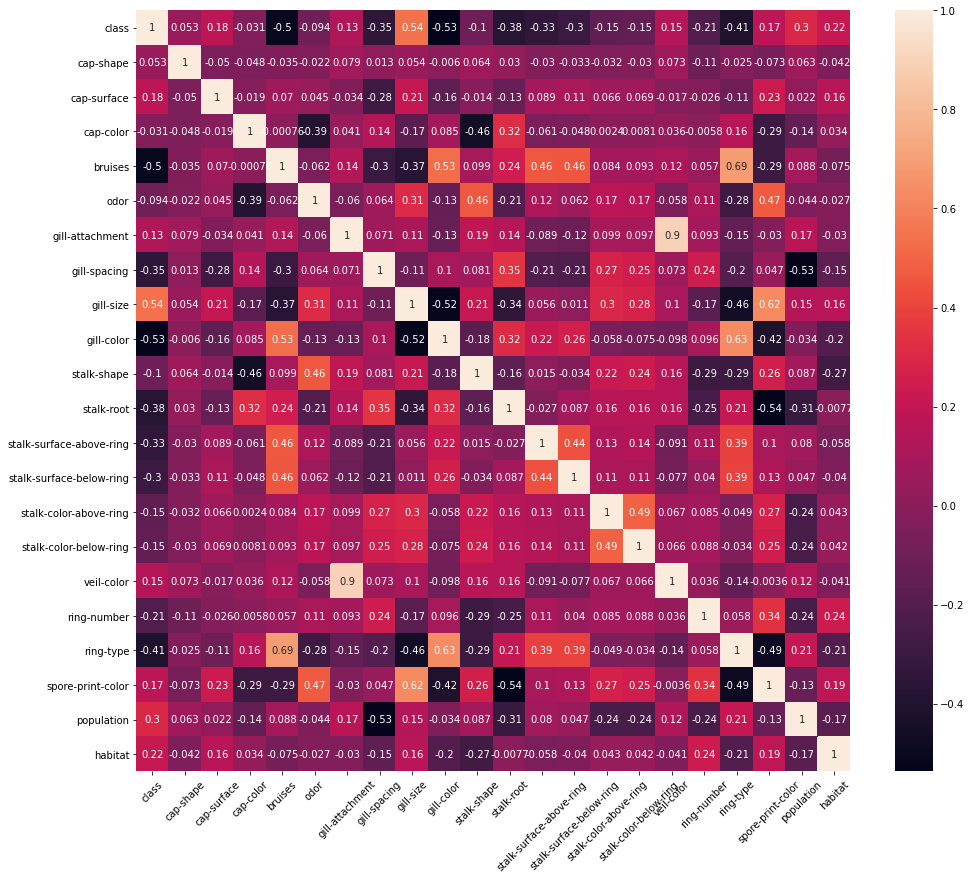

In [37]:
fig= plt.figure(figsize=(16, 14))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45);

### Inference:-
     The countplot visualize that the class distribution is balanced.

### 3.Data preprocessing

In [15]:
## LABEL ENCODING ALL THE CATEGORICAL FEATURES.

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [16]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


**From the above label encoding we can conclude that veil type doesnot contibute anything , so we can remove that feature**

In [17]:
data= data.drop(["veil-type"],axis=1)

**Splitting the dataset**

In [18]:
from sklearn.model_selection import train_test_split
x= data.drop(['class'], axis=1)
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred_dt)
##cm=confusion_matrix(y_test, y_pred)
cm

In [ ]:
accuracy_score(y_test,y_pred_dt)

## 4. Finding out which classification model gives the best result to predict class.

### 4.1 LOGISTIC REGRESSION MODEL

In [19]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [21]:
print("accuracy score of logistic regression",accuracy_score(y_test,y_pred_lr))

accuracy score of logistic regression 0.9499589827727646


In [22]:
cm_lr=confusion_matrix(y_test,y_pred_lr)
cm_lr

array([[1200,   57],
       [  65, 1116]], dtype=int64)

In [29]:
log=[]
log.append(['Logistic Regression',accuracy_score(y_test,y_pred_lr)])

### 4.2 KNN CLASSIFIER MODEL

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    acc_values.append(acc)

In [26]:
acc_values

[0.9963084495488105,
 0.9967186218211649,
 0.9958982772764561,
 0.9954881050041017,
 0.9950779327317474,
 0.9942575881870386,
 0.9942575881870386,
 0.9930270713699754,
 0.9934372436423298,
 0.9934372436423298,
 0.9930270713699754,
 0.9934372436423298]

Text(0, 0.5, 'accuracy value')

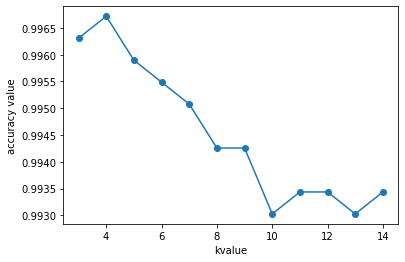

In [27]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy value')

In [28]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred_knn =  classifier.predict(x_test)

In [30]:
print("Accuracy  of knn is :",accuracy_score(y_test,y_pred_knn))

Accuracy  of knn is : 0.9942575881870386


In [31]:
confusion_matrix(y_test,y_pred_knn)

array([[1248,    9],
       [   5, 1176]], dtype=int64)

In [32]:
log.append(['Knn Classifier',accuracy_score(y_test,y_pred_knn)])

### 4.3 DECISION TREE CLASSIFIER

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dtc=dt_model.predict(x_test)
print("Accuracy  of decision tree is :",accuracy_score(y_test,y_pred_dtc))

Accuracy  of decision tree is : 1.0


In [35]:
confusion_matrix(y_test,y_pred_dtc)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [36]:
log.append(['Decision Tree Claasifier',accuracy_score(y_test,y_pred_dtc)])

In [38]:
pd.Series(dt_model.feature_importances_,index=x.columns).sort_values(ascending=False)*100

gill-color                  34.302226
spore-print-color           21.095618
population                  18.033672
gill-size                   11.013023
odor                         4.264733
bruises                      2.766307
habitat                      2.706163
stalk-shape                  2.208304
stalk-color-above-ring       1.964895
stalk-root                   0.763939
stalk-surface-above-ring     0.455627
ring-number                  0.240018
stalk-surface-below-ring     0.185477
cap-surface                  0.000000
gill-spacing                 0.000000
stalk-color-below-ring       0.000000
veil-color                   0.000000
ring-type                    0.000000
gill-attachment              0.000000
cap-color                    0.000000
cap-shape                    0.000000
dtype: float64

**Grill-color has more feature importance than other features.**

### 4.4 RANDOM FOREST CLASSIFIER

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("accuracy score of random forest classifier is",accuracy_score(y_test,y_pred_rf))

accuracy score of random forest classifier is 1.0


In [40]:
confusion_matrix(y_test,y_pred_rf)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [41]:
log.append(['Random Forest Claasifier',accuracy_score(y_test,y_pred_rf)])

### 4.5 GRADIENT BOOSTING CLASSIFIER

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(x_train,y_train)
y_pred_gm=gm.predict(x_test)
print("accuracy score of gradient boosting classifier is",accuracy_score(y_test,y_pred_gm))

accuracy score of gradient boosting classifier is 1.0


In [43]:
confusion_matrix(y_test,y_pred_gm)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [44]:
log.append(['Gradient Boosting Classifier',accuracy_score(y_test,y_pred_gm)])

### 4.6 NAIVE BAYES -GUASSIAN CLASSIFIER

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb=nb.predict(x_test)
##print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100, 2)))
print("accuracy score of naive bayes guassian classifier is",accuracy_score(y_test,y_pred_nb))

accuracy score of naive bayes guassian classifier is 0.9294503691550451


In [46]:
confusion_matrix(y_test,y_pred_nb)

array([[1172,   85],
       [  87, 1094]], dtype=int64)

In [47]:
log.append(['NB Guassian classifier',accuracy_score(y_test,y_pred_nb)])

### 4.7 NAIVE BAYES -BERNOULLI CLASSIFIER

In [49]:
from sklearn.naive_bayes import BernoulliNB
nbber=BernoulliNB()
nbber.fit(x_train,y_train)
y_pred_nbber=nbber.predict(x_test)
##print("Test Accuracy: {}%".format(round(classifier.score(x_test, y_test)*100, 2)))
print("accuracy score of naive bayes bernoulli classifier is",accuracy_score(y_test,y_pred_nbber))

accuracy score of naive bayes bernoulli classifier is 0.8461853978671042


In [50]:
confusion_matrix(y_test,y_pred_nbber)

array([[1193,   64],
       [ 311,  870]], dtype=int64)

In [51]:
 log.append(['NB Bernoulli classifier',accuracy_score(y_test,y_pred_nbber)])

In [52]:
df = pd.DataFrame(log, columns = ['Models','Accuracy Score'])
df

,Models,Accuracy Score
0,Logistic Regression,0.949959
1,Knn Classifier,0.994258
2,Decision Tree Claasifier,1.000000
3,Random Forest Claasifier,1.000000
4,Gradient Boosting Classifier,1.000000
5,NB Guassian classifier,0.929450
6,NB Bernoulli classifier,0.846185


### INFERENCE:-
     The models Decision Tree Claasifier, Random Forest Claasifier, Gradient Boosting Classifier gives 100 percent accuracy score than the rest models. So they can be used as best fit models to predict the class.
       